# Main

In [1]:
#library import and set
import warnings
warnings.filterwarnings("ignore")
import collections

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
plt.style.use('ggplot')

fm.get_fontconfig_fonts()
font_location = '/data/notebook_files/font/esamanru Medium.ttf'
# font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
fprop = fm.FontProperties(fname=font_location)

# matplotlib.rc('font', family=font_name)
# from sklearn import ?
# from sklearn.metrics import ?

<br>

## 1. Preparing dataset (2번부터 실습 진행)

In [2]:
data_df = pd.read_csv('titanic.csv')
data_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Data info

- **PassengerId** : Unique ID of passenger
- **Survived** : 0 = No, 1 = Yes
- **pclass** : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sibsp** : # of siblings & spouses aboard the Titanic
- **parch** : # of parents / children aboard the Titanic
- **ticket** : Ticket number
- **cabin** : Cabin number
- **embarked** : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

<figure>
    <center> <img src="./images/embark_image.png"  alt='missing' width="600"  ><center/>
<figure/>

In [3]:
y_data = data_df[['Survived']]
# y_data.head(3)

In [4]:
del data_df['Survived']
x_data = data_df.copy()
# x_data.head(3)

<br>

## 2. Feature engineering & Feature selection

#### 시도해볼 수 있는 전략들

- 불필요한 열이나 예측에 방해가 되는 열은 아예 지우기 (ex. PassengerId)
- 결측치 채우기 
- Text로 되어있는 Category(Factor)는 숫자로 바꿔주기 (ex. Male/Female -> 0/1)
- 실수 범위를 구간 범위로 바꿔주기 
- 필요한 경우 기존 열을 바탕으로 새로운 열을 계산해 추가하기

In [5]:
# # 기본적인 결측치 채우는 방법
# mean_age = x_data['Age'].median(skipna=True)
# x_data['Age'] = x_data['Age'].fillna(mean_age) # or .fillna(int/float/str 값)

In [6]:
# load a data
data_df = pd.read_csv('titanic.csv')

## EDA

In [7]:
# check df's info 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
data_df.isnull().sum()

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2
dtype: int64

### Analyze Survived 

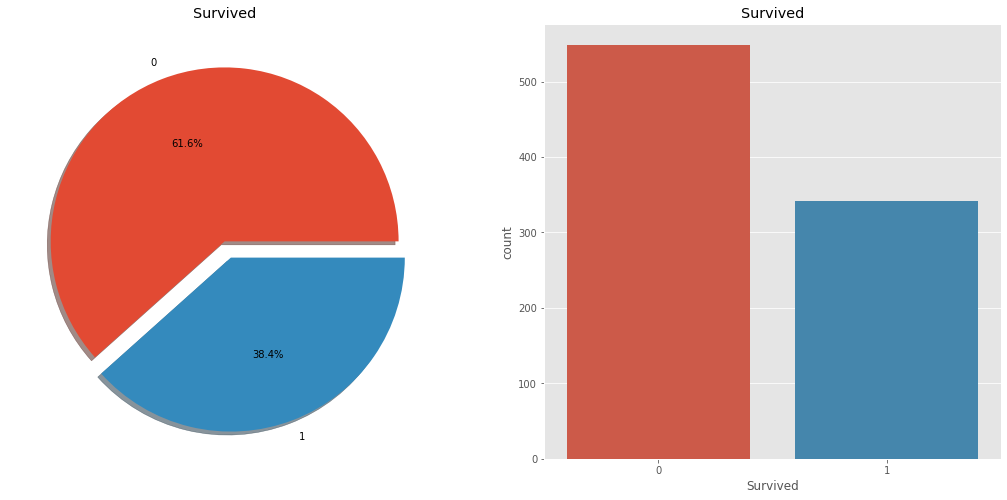

In [10]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%0.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

데이터 891개중 61.6% 사망

Categorical Features in the dataset: Sex,Embarked.

Ordinal Features in the dataset: PClass

Continous Features in the dataset: Age




### Sex 

In [11]:
data_df.groupby(['Sex','Survived'])['Survived'].count()

Sex Survived
female 0 81
 1 233
male 0 468
 1 109
Name: Survived, dtype: int64

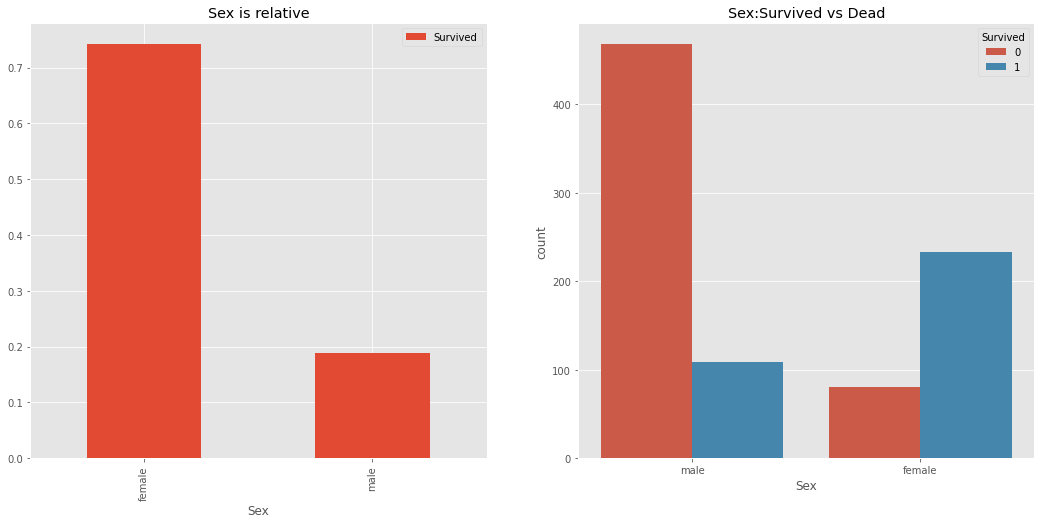

In [12]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Sex is relative')
sns.countplot('Sex',hue='Survived',data=data_df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

남자일때 죽을 확률이 70%가 넘고 여자일 경우 28%정도로 특성이 나타남. 따라서 유효한 데이터

### PClass (선실등급)

In [13]:
pd.crosstab(data_df.Pclass,data_df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


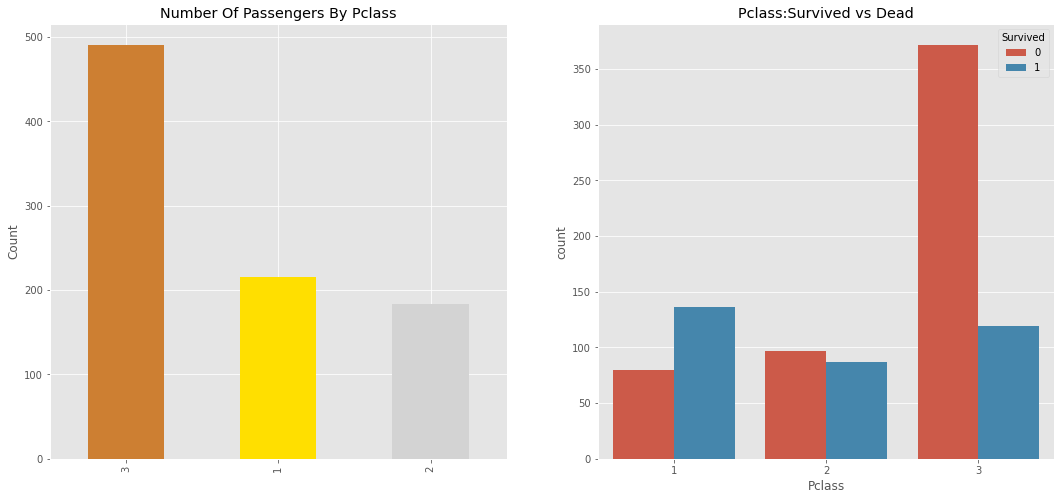

In [14]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

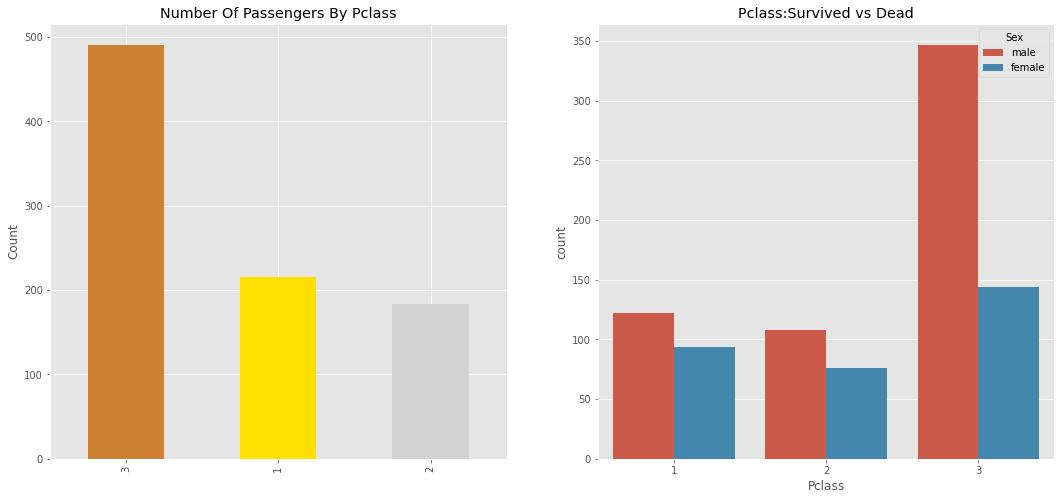

In [15]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Sex',data=data_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

1등급일때 생존률이 50%이상이고 3등급이면 생존이 20%정도로 떨어짐으로써 유효함이 보임임

In [16]:
pd.crosstab([data_df.Sex,data_df.Survived],data_df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

Pclass 
 1 
 2 
 3 
 All 
 
 
 Sex 
 Survived 
   
   
   
   
 
 
 
 
 female 
 0 
 3 
 6 
 72 
 81 
 
 
 1 
 91 
 70 
 72 
 233 
 
 
 male 
 0 
 77 
 91 
 300 
 468 
 
 
 1 
 45 
 17 
 47 
 109 
 
 
 All 
 
 216 
 184 
 491 
 891

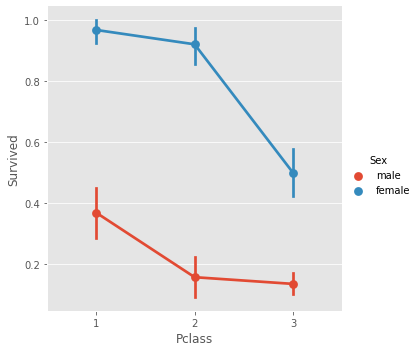

In [17]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data_df)
plt.show()

Pclass1 등급이고 남성이면 생존율이 올라감으로써 유효한 특성임

### Age

In [18]:
print('제일 늙은사람의 나이:',data_df['Age'].max(),'Years')
print('제일 어린사람의 나이:',data_df['Age'].min(),'Years')
print('평균나이 ::',data_df['Age'].mean(),'Years')

제일 늙은사람의 나이: 80.0 Years
제일 어린사람의 나이: 0.42 Years
평균나이 :: 29.69911764705882 Years


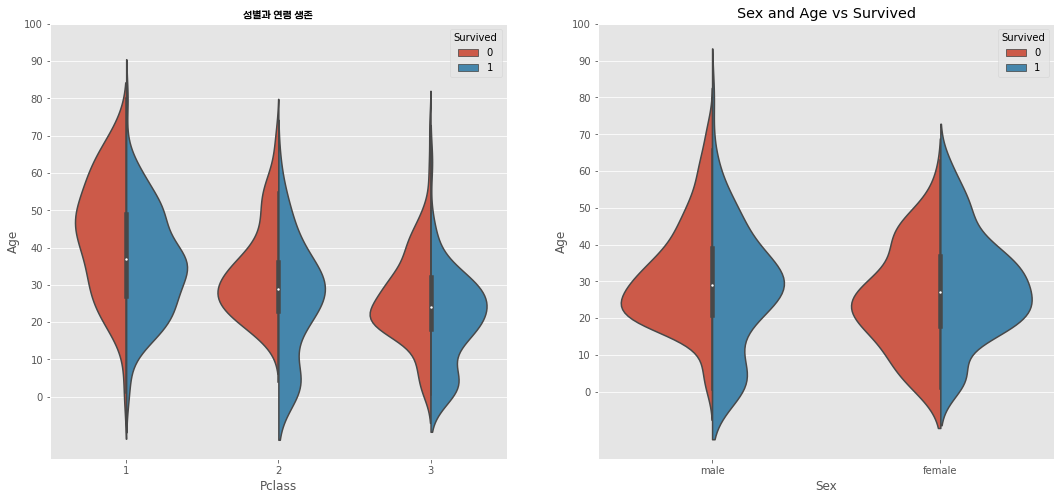

In [19]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data_df,split=True,ax=ax[0])
ax[0].set_title('성별과 연령 생존' , fontproperties=fprop)
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### Name

In [20]:
np.count_nonzero(data_df.Name.unique())

891

유니크해서 사용하기 어려움 따라서 영어권 칭호를 분석

In [21]:
data_df['Title'] = data_df.Name.str.extract('\s([A-Za-z]+\.)\s')

In [22]:
data_df['Title'].value_counts()

Mr. 517
Miss. 182
Mrs. 125
Master. 40
Dr. 7
Rev. 6
Mlle. 2
Major. 2
Col. 2
Countess. 1
Capt. 1
Ms. 1
Sir. 1
Lady. 1
Mme. 1
Don. 1
Jonkheer. 1
Name: Title, dtype: int64

In [23]:
pd.crosstab(data_df.Title,data_df.Sex).T.style.background_gradient(cmap='hot_r') #Checking the Initials with the Sex

Title,Capt.,Col.,Countess.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


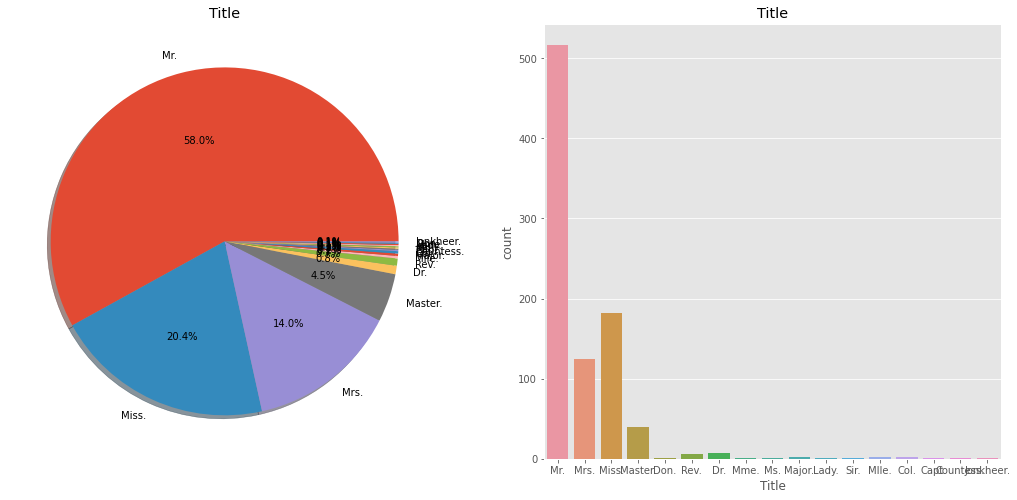

In [24]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df['Title'].value_counts().plot.pie(autopct='%0.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Title')
ax[0].set_ylabel('')
sns.countplot('Title',data=data_df,ax=ax[1])
ax[1].set_title('Title')
plt.show()

In [25]:
# Title에 따른 Age의 평균및 수 
data_df.groupby('Title').agg({'Age':[np.mean,'count']})

Age 
 
 
 
 mean 
 count 
 
 
 Title 
 
 
 
 
 
 
 Capt. 
 70.000000 
 1 
 
 
 Col. 
 58.000000 
 2 
 
 
 Countess. 
 33.000000 
 1 
 
 
 Don. 
 40.000000 
 1 
 
 
 Dr. 
 42.000000 
 6 
 
 
 Jonkheer. 
 38.000000 
 1 
 
 
 Lady. 
 48.000000 
 1 
 
 
 Major. 
 48.500000 
 2 
 
 
 Master. 
 4.574167 
 36 
 
 
 Miss. 
 21.773973 
 146 
 
 
 Mlle. 
 24.000000 
 2 
 
 
 Mme. 
 24.000000 
 1 
 
 
 Mr. 
 32.368090 
 398 
 
 
 Mrs. 
 35.898148 
 108 
 
 
 Ms. 
 28.000000 
 1 
 
 
 Rev. 
 43.166667 
 6 
 
 
 Sir. 
 49.000000 
 1

Monsieur" (M.) for a man, The plural is Messieurs (MM. for short).

"Madame" (Mme) for a woman. The plural is Mesdames (Mmes). (= Madame) Mrs

"Mademoiselle" (Mlle) is a traditional alternative for an unmarried woman. The plural is Mesdemoiselles (Mlles).

"Lady" is also a formal title in the United Kingdom. "Lady" is used before the family name of a woman with a title of nobility or honorary title suo jure (in her own right), or the wife of a lord, a baronet, Scottish feudal baron, laird, or a knight, and also before the first name of the daughter of a duke, marquess, or earl.

#### 같은 의미를 뜻하는 칭호 통합 및 마이너 칭호 개수가 6이하를 통합

#### Name 처리 함수

In [26]:

def preprocess_title(title_name):
    title_dict = {
        'Mr.' : ['Mr.'],
        'Miss.' : ['Ms.', 'Mlle.', 'Miss.'],
        'Mrs.' : ['Mrs.', 'Mme.'],
        'etc' : ['Rev.', 'Sir.', 'Dr.', 'Capt.', 'Col.', 'Countess.', 'Don.', 'Jonkheer.', 'Lady.', 'Major.' ],
        'Master.' : ['Master.'],
    }
    for title, list in title_dict.items():
        if title_name in list :
            return title

In [27]:
data_df.Title = data_df.Title.apply(preprocess_title)

In [28]:
data_df.Title.value_counts()

Mr. 517
Miss. 185
Mrs. 126
Master. 40
etc 23
Name: Title, dtype: int64

In [29]:
data_df.drop('Name', inplace=True, axis=1)

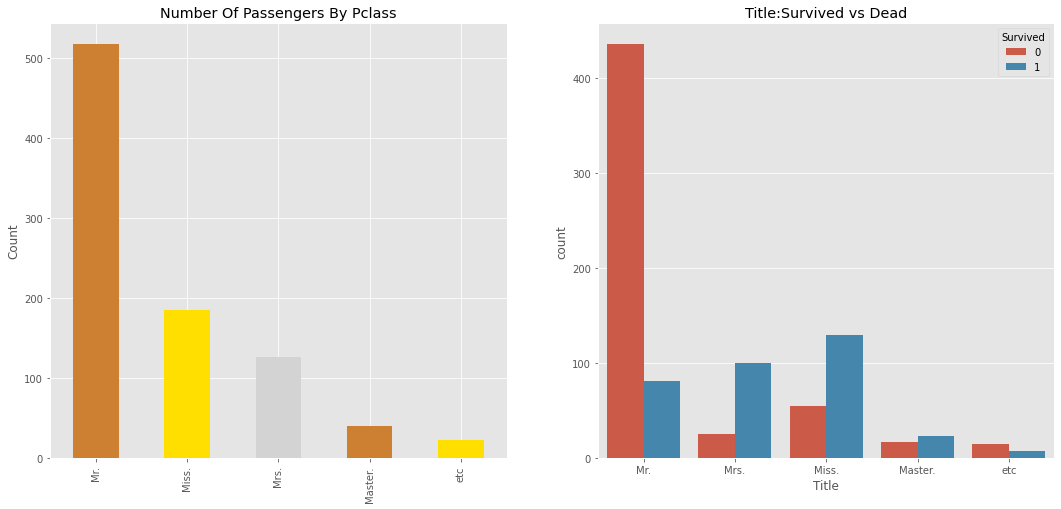

In [30]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df['Title'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Title',hue='Survived',data=data_df,ax=ax[1])
ax[1].set_title('Title:Survived vs Dead')
plt.show()

### Embarked

<figure>
    <center> <img src="./images/embark_image.png"  alt='missing' width="600"  ><center/>
<figure/>

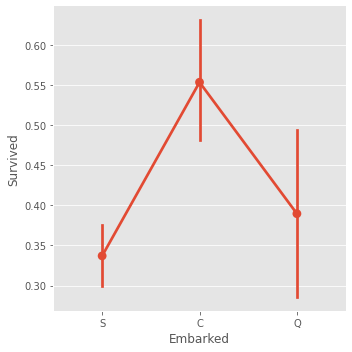

In [31]:
sns.factorplot('Embarked','Survived',data=data_df)
fig=plt.gcf()
plt.show()

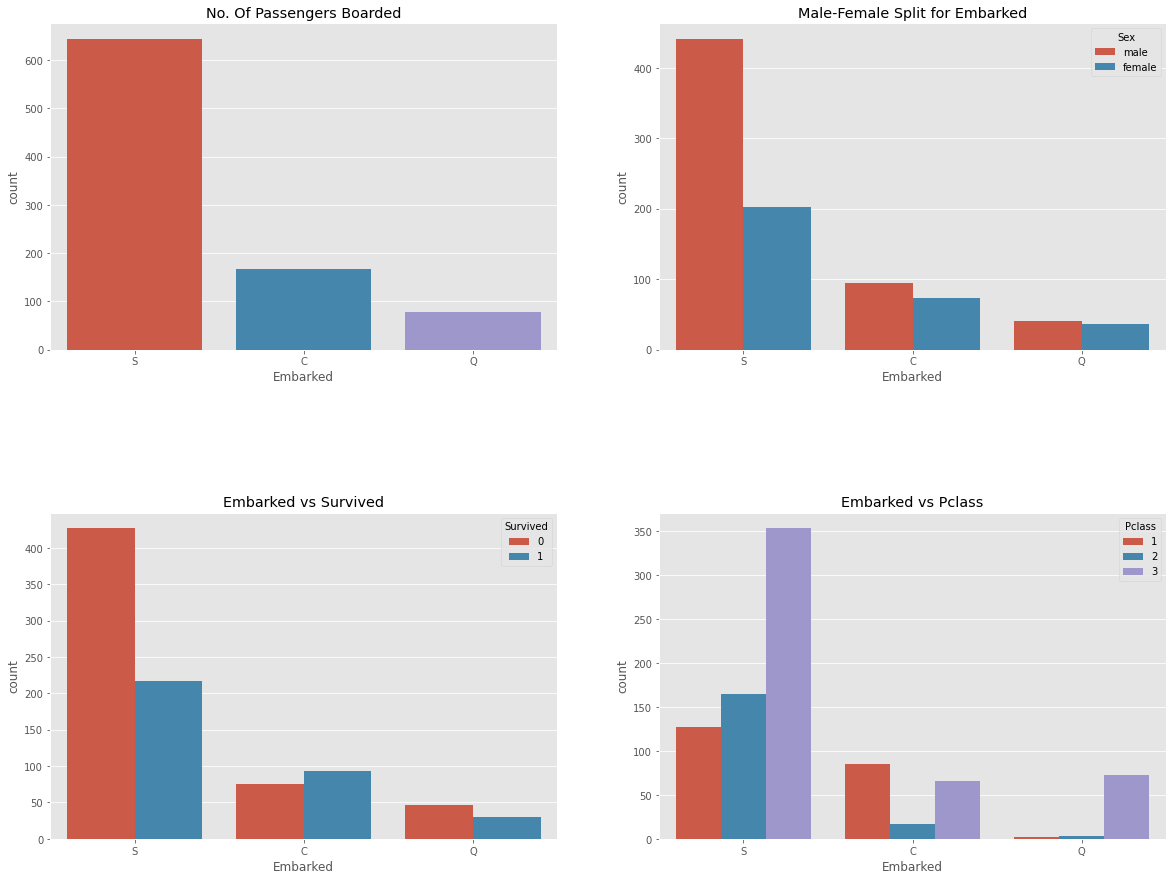

In [32]:
fig,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data_df,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data_df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data_df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data_df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [33]:
data_df.groupby(['Embarked','Pclass']).agg({'Fare':[np.mean,np.std,], })

Fare 
 
 
 
 
 mean 
 std 
 
 
 Embarked 
 Pclass 
 
 
 
 
 
 
 C 
 1 
 104.718529 
 99.093935 
 
 
 2 
 25.358335 
 11.345067 
 
 
 3 
 11.214083 
 4.871528 
 
 
 Q 
 1 
 90.000000 
 0.000000 
 
 
 2 
 12.350000 
 0.000000 
 
 
 3 
 11.183393 
 6.721677 
 
 
 S 
 1 
 70.364862 
 58.811278 
 
 
 2 
 20.327439 
 13.630741 
 
 
 3 
 14.644083 
 13.276609

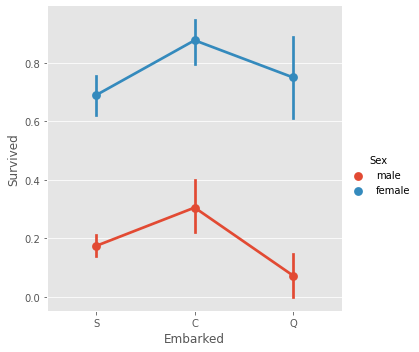

In [34]:
sns.factorplot('Embarked','Survived',hue='Sex',data=data_df)
plt.show()

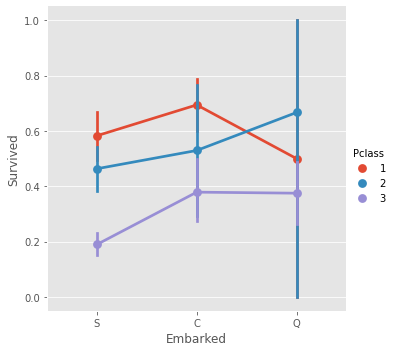

In [35]:
sns.factorplot('Embarked','Survived',hue='Pclass',data=data_df)
plt.show()

In [36]:
data_df[data_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,female,38.0,0,0,113572,80.0,B28,NaN,Miss.
829,830,1,1,female,62.0,0,0,113572,80.0,B28,NaN,Mrs.


In [37]:
data_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [38]:
data_df.SibSp

0 1
1 1
2 0
3 1
4 0
 ..
886 0
887 0
888 1
889 0
890 0
Name: SibSp, Length: 891, dtype: int64

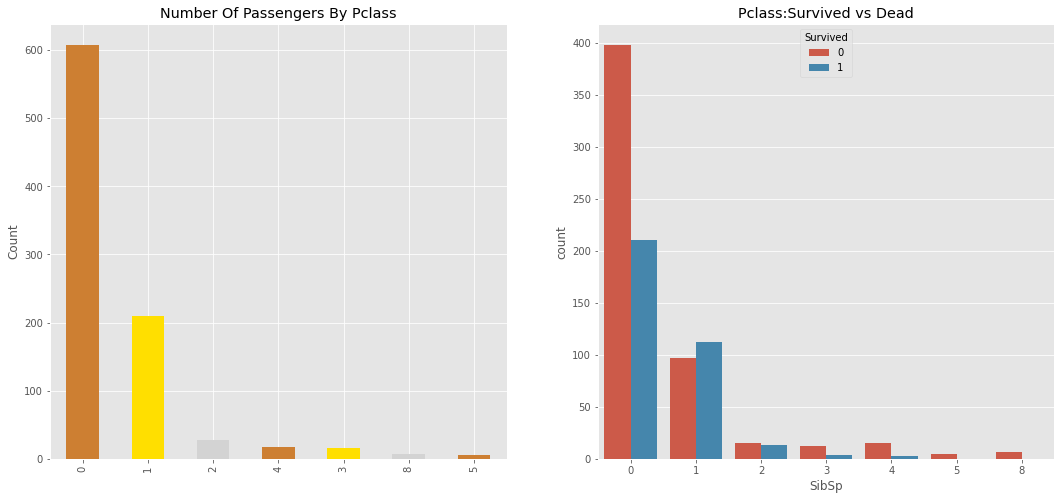

In [39]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df['SibSp'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('SibSp',hue='Survived',data=data_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [40]:
data_df.Parch

0 0
1 0
2 0
3 0
4 0
 ..
886 0
887 0
888 2
889 0
890 0
Name: Parch, Length: 891, dtype: int64

### Sibsp

### Parch

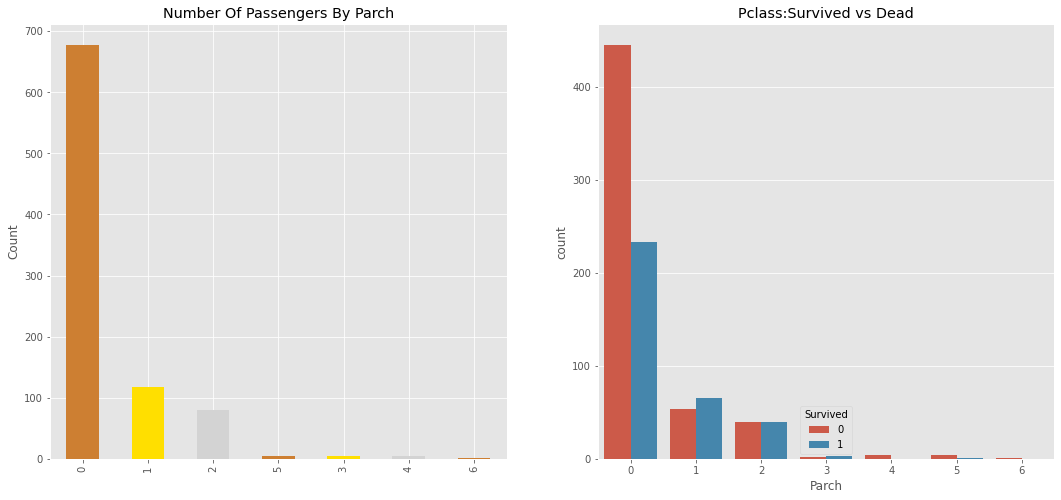

In [41]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
data_df['Parch'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Parch')
ax[0].set_ylabel('Count')
sns.countplot('Parch',hue='Survived',data=data_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

### Ticket

In [42]:
data_df.Ticket

0 A/5 21171
1 PC 17599
2 STON/O2. 3101282
3 113803
4 373450
 ... 
886 211536
887 112053
888 W./C. 6607
889 111369
890 370376
Name: Ticket, Length: 891, dtype: object

### Cabin

In [43]:
data_df.Cabin

0 NaN
1 C85
2 NaN
3 C123
4 NaN
 ... 
886 NaN
887 B42
888 NaN
889 C148
890 NaN
Name: Cabin, Length: 891, dtype: object

In [44]:
data_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

## 데이터 전처리

In [45]:
# 전처리용 라이브러리 임포트
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Age예측 데이터 생성

In [46]:
# 데이터프레임 백업
# 최빈값으로 결측치 대체 
data_df['Embarked'] =data_df.Embarked.fillna('S')
data_back_df = data_df.copy()
data_df.drop(['PassengerId','Cabin', 'Ticket'], inplace=True, axis=1)

In [47]:
data_df_with_survived = data_df.copy()
data_df.drop('Survived', inplace=True, axis=1)

In [48]:
# 테스트용 df 
test_df = data_df.copy()

### Age Preprocessing Pipeline 

In [49]:
#one Hot encoding col name 유지 하기 
#import warnings
from sklearn.base import BaseEstimator
class PassthroughTransformer(BaseEstimator):
  def fit(self, X, y = None):
    self.cols = X.columns
    return self

  def transform(self, X, y = None):
    self.cols = X.columns
    return X.values

  def get_feature_names(self):
    return self.cols

In [50]:
# 카테고리 원핫인코딩 일괄적용 

#Categories
exclue_age_numeric_features = [ 'SibSp', 'Parch', 'Fare', ]
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', ]
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title']

#Model 
numeric_transformer = MinMaxScaler() # cf) RobustScaler
categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore') 

#전처리 파이프라인
categori_preprocessor = ColumnTransformer(
        [('cat', categorical_transformer, categorical_features),
        ('numeri', numeric_transformer, exclue_age_numeric_features)],
        remainder='passthrough'
)


In [51]:
age_test_df = test_df[test_df['Age'].isnull()]
age_train_df =test_df[~test_df['Age'].isnull()]

In [52]:
test_df.shape

(891, 8)

In [53]:
age_train_df.shape[0] + age_test_df.shape[0]

891

In [54]:
#원핫 인코딩후 반환
categori_preprocessor.fit(age_train_df)
trans_age_train_df = categori_preprocessor.transform(age_train_df)
trans_age_null_df = categori_preprocessor.transform(age_test_df)

# 컬럼 내용 처리
tx = categori_preprocessor.get_params()['transformers']

feature_names =[]
for name,transformer,features in tx:
    try:
        Var = categori_preprocessor.named_transformers_[name].get_feature_names().tolist()
    except AttributeError:
        Var = features
    feature_names = feature_names + Var

In [55]:
#데이터 프레임으로 반환
trans_age_train_df = pd.DataFrame(trans_age_train_df, columns=feature_names+['Age']) # passthrough한 feature 열이름 추가
trans_age_null_df = pd.DataFrame(trans_age_null_df, columns=feature_names+['Age']) # passthrough한 feature 열이름 추가

In [56]:
trans_age_train_df_x = trans_age_train_df.drop('Age', axis=1)
trans_age_train_df_y = trans_age_train_df['Age']

trans_age_null_df_x = trans_age_null_df.drop('Age', axis=1)

### Age 예측

In [57]:
# Model들 import
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [58]:
# 모델선언
LinearModel = LinearRegression()
LassoModel = Lasso(alpha=1)
RidgeModel = Ridge(alpha=0.1)
xgbrModel = XGBRegressor()


#테스트 셋 분할
age_X_train, age_X_test, age_y_train, age_y_test = train_test_split(trans_age_train_df_x, trans_age_train_df_y, random_state=5441)



In [59]:
#모델 훈련 
LinearModel.fit(age_X_train,age_y_train)
LassoModel.fit(age_X_train,age_y_train)
RidgeModel.fit(age_X_train,age_y_train)
xgbrModel.fit(age_X_train,age_y_train)
#모델 테스트 
print("Linear Model")
print("훈련 세트 점수: {:.3f}".format(LinearModel.score(age_X_train, age_y_train)))
print("테스트 세트 점수: {:.3f}".format(LinearModel.score(age_X_test, age_y_test)))

#과적합을 막는 모델이라서 데이터가 적은곳에서는 사용하기 어려움
print("Lasso Model")
print("훈련 세트 점수: {:.3f}".format(LassoModel.score(age_X_train, age_y_train)))
print("테스트 세트 점수: {:.3f}".format(LassoModel.score(age_X_test, age_y_test)))

print("Ridge Model")
print("훈련 세트 점수: {:.3f}".format(RidgeModel.score(age_X_train, age_y_train)))
print("테스트 세트 점수: {:.3f}".format(RidgeModel.score(age_X_test, age_y_test)))

print("XGB Regressor")
print("훈련 세트 점수: {:.3f}".format(xgbrModel.score(age_X_train, age_y_train)))
print("테스트 세트 점수: {:.3f}".format(xgbrModel.score(age_X_test, age_y_test)))

Linear Model
훈련 세트 점수: 0.432
테스트 세트 점수: 0.366
Lasso Model
훈련 세트 점수: 0.229
테스트 세트 점수: 0.234
Ridge Model
훈련 세트 점수: 0.433
테스트 세트 점수: 0.381
XGB Regressor
훈련 세트 점수: 0.794
테스트 세트 점수: 0.230


In [60]:
LinearModel.predict(trans_age_null_df_x)

array([ 37. , 34.75, 30.25, 27. , 25.25, 29.75, 41.25, 25.25,
 27. , 27. , 29.75, 34.75, 25.25, 22.5 , 44.25, 41.5 ,
 2.5 , 29.75, 29.75, 25.25, 29.75, 29.75, 29.75, 29.75,
 23. , 29.75, 37. , 13.25, 30.5 , 30. , 29.75, -10.5 ,
 47.5 , 44.5 , 1. , 0.5 , 32. , 44. , 37.75, 37. ,
 25.25, 11.75, 34.75, 29.75, 11.5 , 18.5 , 13.25, 23. ,
 30. , 44.5 , 37. , 25.25, 44.25, 25.25, 35. , 44.5 ,
 41.5 , 44.25, 25.25, 32.25, 30. , 29.75, 29. , 11.75,
 21. , 44.25, 29.75, 31. , 44.25, 27. , 25.25, 25.25,
 34.75, 30.25, 25.25, 42. , 29.75, 37. , 11.5 , 29.75,
 37. , 35. , 33. , 27. , 30. , 37. , 31. , 29.75,
 27.5 , 29.75, 45.5 , 37. , 29.75, 35. , 37. , 30. ,
 44. , 35. , 11.5 , 27.5 , 27. , 29.75, 25.25, 44.5 ,
 29.75, 36.75, 27. , 27. , 42. , 27. , 30.5 , 29.75,
 32. , 37. , 39. , 37. , 29.75, 18.5 , 27. , 25.25,
 28. , 27. , 29.75, 25.5 , 23. , 27. , 29.75, 44.25,
 30. , 23. , 37. , 37. , 44.75, 27.5 , 29.25, 30. ,
 29.75, 25.25, 29.75, 29.75, 45.5 , 35. , 25.25, 29.25,
 25.25, 2.5 , 44.5 , 36.75, 25.25, 35. , 29.75, 29.75,
 44.25, 29.75, 47. , 34.5 , 27. , 37. , 37. , 27.5 ,
 37. , 0.5 , 41.5 , 44.75, 37. , 29.25, 37. , 27. ,
 29.75, 41.5 , 11.75, 42. , 27. , 0.5 , 29.75, 29.75,
 16. ])

In [61]:
RidgeModel.predict(trans_age_null_df_x)

array([ 36.76323471, 33.96700459, 30.0721545 , 27.1712263 ,
 25.58469671, 30.11443418, 40.01573226, 25.58633877,
 27.17117292, 27.16270082, 30.11247439, 34.53319143,
 25.58633877, 22.70642709, 43.61809519, 40.76523097,
 1.52825327, 30.11443418, 30.11247439, 25.58586216,
 30.11247439, 30.11247439, 30.11443418, 30.11596948,
 23.23735688, 30.11247439, 36.77223679, 13.58889187,
 29.84310764, 30.12184759, 30.10468987, -11.25757332,
 46.20763607, 43.73978793, 0.06899023, 0.89346106,
 30.9892169 , 43.43380854, 37.43411963, 36.77223679,
 25.58633877, 12.07935909, 34.63168946, 30.11443418,
 12.22002461, 18.93293108, 13.75290198, 23.3472934 ,
 30.12264193, 43.01188819, 36.77223679, 25.58633877,
 43.6752876 , 25.58633877, 34.1322271 , 43.73883472,
 40.76523097, 43.68164231, 25.58633877, 32.29414606,
 29.44531726, 30.11247439, 28.52238547, 12.07935909,
 21.10824804, 43.13104608, 30.11443418, 30.7705444 ,
 43.6244499 , 27.1712263 , 25.58469671, 25.58469671,
 34.53319143, 30.07210112, 25.58633877, 40.8335837 ,
 30.11443418, 36.77250115, 12.22002461, 30.11443418,
 36.78356978, 34.1322271 , 33.01340259, 27.16270082,
 30.12264193, 36.77223679, 30.7705444 , 30.11168005,
 27.82047267, 30.11247439, 44.17051811, 36.77223679,
 30.11247439, 34.1322271 , 36.77255453, 30.12264193,
 43.40838969, 34.1322271 , 12.22002461, 27.82047267,
 27.07929522, 30.02287295, 25.58787407, 43.73184454,
 30.11247439, 36.56380224, 27.1712263 , 27.17117292,
 41.25059383, 27.17117292, 29.75271186, 30.03049861,
 31.00430934, 36.7712302 , 38.22583465, 36.77223679,
 30.11247439, 18.92657637, 27.17117292, 25.58633877,
 27.83967609, 27.15232103, 30.11247439, 25.45923166,
 22.52691808, 27.1712263 , 30.11443418, 43.53040016,
 30.12518382, 23.3472934 , 36.77223679, 36.77244904,
 44.06927975, 27.8696162 , 29.49675617, 30.1188291 ,
 30.11443418, 25.58533218, 30.11443418, 30.11596948,
 44.16877056, 34.1322271 , 25.58141387, 29.49675617,
 25.58655101, 1.52825327, 43.73184454, 36.67373875,
 25.58649764, 34.1322271 , 30.11443418, 30.11443418,
 43.68799702, 30.03049861, 47.72919234, 34.42325491,
 27.1712263 , 36.77223679, 36.77239566, 27.64909483,
 36.77223679, 0.89346106, 40.72742044, 44.06927975,
 36.78240433, 29.49675617, 36.77223679, 27.17117292,
 30.11247439, 40.74007648, 12.07935909, 40.74546418,
 27.17117292, 0.89346106, 30.09404573, 30.11443418,
 16.4631968 ])

In [62]:
# 리니어 모델 weight값과 bias
linear_wb = pd.DataFrame(LinearModel.coef_, index=feature_names).T
linear_wb['bias'] = LinearModel.intercept_
linear_wb

,x0_1,x0_2,x0_3,x1_female,x1_male,x2_C,x2_Q,x2_S,x3_Master.,x3_Miss.,x3_Mr.,x3_Mrs.,x3_etc,SibSp,Parch,Fare,bias
0,6.421804e+14,6.421804e+14,6.421804e+14,-5.422992e+14,-5.422992e+14,-4.036509e+13,-4.036509e+13,-4.036509e+13,1.505642e+15,1.505642e+15,1.505642e+15,1.505642e+15,1.505642e+15,-10.833984,0.288239,-6.53125,-1.565158e+15


In [63]:
# 릿지 모델 weight값과 bias
ridge_wb = pd.DataFrame(RidgeModel.coef_, index=feature_names).T
ridge_wb['bias'] = RidgeModel.intercept_
ridge_wb

,x0_1,x0_2,x0_3,x1_female,x1_male,x2_C,x2_Q,x2_S,x3_Master.,x3_Miss.,x3_Mr.,x3_Mrs.,x3_etc,SibSp,Parch,Fare,bias
0,7.930516,-2.006537,-5.923979,-7.236356,7.236356,-4.186472,5.421211,-1.234739,-24.224624,2.399121,-0.887692,16.485948,6.227247,-10.702737,-0.381321,-6.511409,31.024839


**모델의 w,b값을 확인결과 x3_Master의 가중치가 -인 RidgeModel이 더 합리적이라서 Ridge 모델을 Age예측에 채택**

In [65]:
data_df_with_survived.loc[data_df_with_survived['Age'].isna(), 'Age'] =np.round(RidgeModel.predict(trans_age_null_df_x),0)

In [66]:
data_df_with_survived.to_csv('no_na_titanic_df.csv')

In [67]:
data_df_with_survived.isna().sum()

Survived 0
Pclass 0
Sex 0
Age 0
SibSp 0
Parch 0
Fare 0
Embarked 0
Title 0
dtype: int64

<br>

## 2. Train - Test split (비율을 7:3 으로 유지해주시고, seed는 0을 적용해주세요)

In [ ]:
# 아직해야할거 테스트 스플릿이랑 데이터 파이프라인 

In [68]:
titan_df = pd.read_csv('no_na_titanic_df.csv')
train_test_split(titan_df,random_state=0, test_size=0.3)

[     Unnamed: 0  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
 857         857         1       1    male  51.0      0      0  26.5500   
 52           52         1       1  female  49.0      1      0  76.7292   
 386         386         0       3    male   1.0      5      2  46.9000   
 124         124         0       1    male  54.0      0      1  77.2875   
 578         578         0       3  female  28.0      1      0  14.4583   
 ..          ...       ...     ...     ...   ...    ...    ...      ...   
 835         835         1       1  female  39.0      1      1  83.1583   
 192         192         1       3  female  19.0      1      0   7.8542   
 629         629         0       3    male  37.0      0      0   7.7333   
 559         559         1       3  female  36.0      1      0  17.4000   
 684         684         0       2    male  60.0      1      1  39.0000   
 
     Embarked    Title  
 857        S      Mr.  
 52         C     Mrs.  
 386        S  Master. 

In [69]:
titan_df.drop('Unnamed: 0', inplace=True,axis=1)

In [70]:
titanic_x =titan_df.drop('Survived', axis=1)
titanic_y = titan_df['Survived']

In [71]:
titanic_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,female,38.0,1,0,71.2833,C,Mrs.
2,3,female,26.0,0,0,7.9250,S,Miss.
3,1,female,35.0,1,0,53.1000,S,Mrs.
4,3,male,35.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,etc
887,1,female,19.0,0,0,30.0000,S,Miss.
888,3,female,16.0,1,2,23.4500,S,Miss.
889,1,male,26.0,0,0,30.0000,C,Mr.


### 원핫 인코딩, 스케일러 적용

In [72]:
# 카테고리 원핫인코딩 일괄적용 

#Categories
exclue_age_numeric_features = [ 'SibSp', 'Parch', 'Fare', ]
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', ]
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title']

#Model 
numeric_transformer = MinMaxScaler() # cf) RobustScaler
categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore') 

#전처리 파이프라인
categori_preprocessor = ColumnTransformer(
        [('cat', categorical_transformer, categorical_features),
        ('numeri', numeric_transformer, exclue_age_numeric_features)],
        remainder='passthrough'
)

<br>

## 3. Create model instance variable (동시에 여러 모델을 다른 이름으로 만들 수 있습니다.)

<br>

## 4. Train the model

<br>

## 5. Predict on test data & Check the result with metrics (모델 간 비교가 가능합니다.)

# Sheet 2

In [73]:
data_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,female,38.0,1,0,71.2833,C,Mrs.
2,3,female,26.0,0,0,7.9250,S,Miss.
3,1,female,35.0,1,0,53.1000,S,Mrs.
4,3,male,35.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,etc
887,1,female,19.0,0,0,30.0000,S,Miss.
888,3,female,NaN,1,2,23.4500,S,Miss.
889,1,male,26.0,0,0,30.0000,C,Mr.
